# Imbalanced Learning

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict

### Chech imbalanced variables

In [2]:
df = pd.read_csv('imbd_cleaned.csv')

In [3]:
df.dtypes

originalTitle          object
rating                 object
startYear               int64
runtimeMinutes        float64
awardWins             float64
numVotes              float64
totalImages           float64
totalVideos           float64
totalCredits            int64
criticReviewsTotal    float64
titleType              object
AwNmExWins            float64
canHaveEpisodes         int64
isAdult                 int64
numRegions              int64
userReviewsTotal      float64
countryOfOrigin        object
genres                 object
castNumber            float64
companiesNumber       float64
averageRating         float64
regions                object
externalLinks         float64
writerCredits         float64
directorsCredits      float64
soundMixes             object
quotesTotal           float64
dtype: object

In [4]:
del df['originalTitle']
del df['rating']
del df['genres']
del df['countryOfOrigin']
del df['titleType']
del df['regions']
del df['soundMixes']

## Creiamo la variabile has_award

In [5]:
df['has_award'] = df['awardWins'] > 0
df['has_award'] = (df['awardWins'].fillna(0) > 0).astype(int)

In [6]:
df.describe()

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,AwNmExWins,canHaveEpisodes,...,numRegions,userReviewsTotal,castNumber,companiesNumber,averageRating,externalLinks,writerCredits,directorsCredits,quotesTotal,has_award
count,148624.000000,148624.00000,148624.000000,148624.000000,148624.000000,148624.000000,148624.000000,148624.000000,148624.000000,148624.000000,...,148624.00000,148624.000000,148624.000000,148624.000000,148624.000000,148624.000000,148624.000000,148624.000000,148624.000000,148624.000000
mean,1994.904033,41.20062,0.090815,3.809885,1.133666,0.067701,52.377395,0.349184,0.104147,0.069652,...,2.69766,0.544590,2.373268,1.315607,6.873388,0.842966,0.867662,0.606135,0.218909,0.078352
std,24.908551,42.90271,0.354451,1.607073,1.110513,0.266862,69.672784,0.766884,0.386245,0.254561,...,4.78779,0.940656,1.070420,0.920745,1.348889,1.049074,0.662543,0.345369,0.636980,0.268726
min,1878.000000,0.00000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1981.000000,0.00000,0.000000,2.564949,0.693147,0.000000,16.000000,0.000000,0.000000,0.000000,...,1.00000,0.000000,1.791759,0.693147,6.100000,0.000000,0.000000,0.693147,0.000000,0.000000
50%,1999.000000,29.00000,0.000000,3.367296,0.693147,0.000000,34.000000,0.000000,0.000000,0.000000,...,1.00000,0.000000,2.564949,1.098612,7.100000,0.693147,0.693147,0.693147,0.000000,0.000000
75%,2015.000000,72.00000,0.000000,4.653960,1.609438,0.000000,63.000000,0.000000,0.000000,0.000000,...,2.00000,0.693147,3.091042,1.791759,7.800000,1.386294,1.386294,0.693147,0.000000,0.000000
max,2024.000000,780.00000,6.102559,13.906790,8.392083,6.856462,5480.000000,6.075346,4.836282,1.000000,...,73.00000,8.116716,8.440096,6.347389,10.000000,6.359574,3.951244,4.077537,5.883322,1.000000


In [7]:
df.dtypes

startYear               int64
runtimeMinutes        float64
awardWins             float64
numVotes              float64
totalImages           float64
totalVideos           float64
totalCredits            int64
criticReviewsTotal    float64
AwNmExWins            float64
canHaveEpisodes         int64
isAdult                 int64
numRegions              int64
userReviewsTotal      float64
castNumber            float64
companiesNumber       float64
averageRating         float64
externalLinks         float64
writerCredits         float64
directorsCredits      float64
quotesTotal           float64
has_award               int64
dtype: object

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score 

In [9]:
df = df.drop(columns=['awardWins'])

In [10]:
X = df.drop(columns=['has_award'])
y = df['has_award']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, 
                                                    stratify=y)

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
norm = MinMaxScaler()
norm.fit(X_train)

X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

In [13]:
ctr = Counter(y_train)
ctr

Counter({0: 95885, 1: 8151})

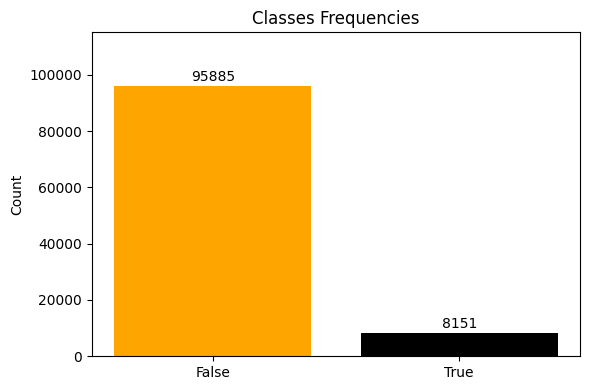

In [14]:
import matplotlib.pyplot as plt

# Supponendo che ctr = {False: 138704, True: 10827}
labels = ['False', 'True']               # Etichette leggibili
values = [ctr[False], ctr[True]]         # Valori ordinati secondo le etichette
colors = ['orange', 'black']             # Colori coerenti con le etichette

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=colors)

# Etichette sopra le barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1000, f'{yval}', ha='center', va='bottom')

plt.title('Classes Frequencies')
plt.ylabel('Count')
plt.ylim(0, max(values) * 1.2)


plt.tight_layout()
plt.show()



In [15]:
# Faccio il decision tree (SENZA OVERSAMPLING)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred0 = clf.predict(X_test)

y_val_pred_proba_og = clf.predict_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.9155602404234323
F1-score [0.9542966  0.44607915]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     41094
           1       0.46      0.43      0.45      3494

    accuracy                           0.92     44588
   macro avg       0.71      0.70      0.70     44588
weighted avg       0.91      0.92      0.91     44588



# Tutti i metodi applicabili sono stati applicati uno per uno di seguito, con parametri standard

# Undersampling

In [16]:
# !pip install imblearn

In [17]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours

### RandomUnderSampler

In [18]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 8151, 1: 8151})


In [19]:
def plot_pca(X_pca, y_train):
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()

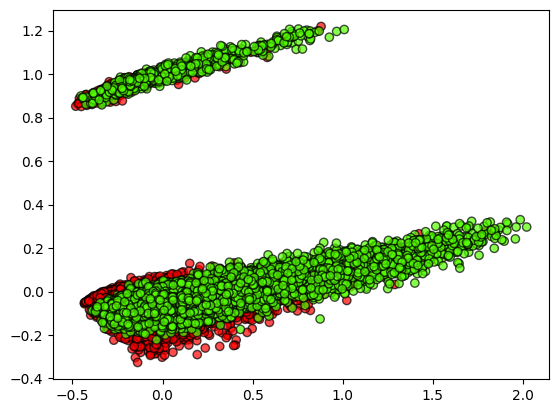

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

In [21]:
# Faccio il decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# fit
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# predict
y_pred = clf.predict(X_test)

# Return probability estimates for the test data X.
y_val_pred_proba = clf.predict_proba(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87     41094
           1       0.24      0.77      0.36      3494

    accuracy                           0.79     44588
   macro avg       0.61      0.78      0.62     44588
weighted avg       0.92      0.79      0.83     44588



### Tomek Links

In [22]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 94111, 1: 8151})


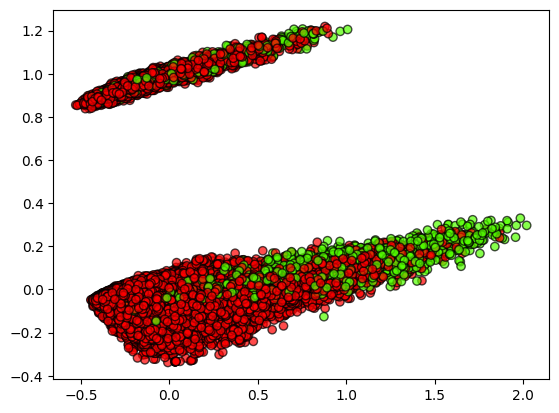

In [23]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

In [24]:
# Faccio il decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# fit
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# predict
y_pred = clf.predict(X_test)

# Return probability estimates for the test data X.
y_val_pred_proba = clf.predict_proba(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     41094
           1       0.45      0.44      0.45      3494

    accuracy                           0.91     44588
   macro avg       0.70      0.70      0.70     44588
weighted avg       0.91      0.91      0.91     44588



### Edited Nearest Neighbors

In [25]:
enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 85580, 1: 8151})


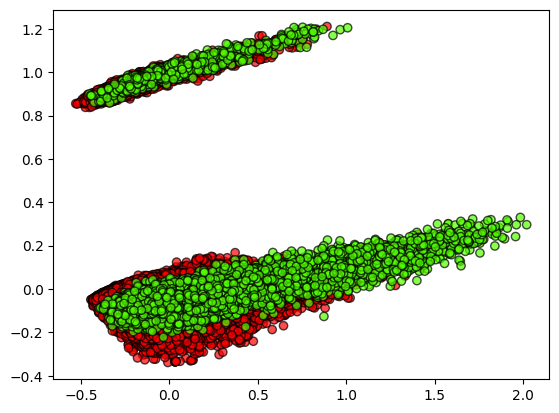

In [26]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

In [27]:
# Faccio il decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# fit
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# predict
y_pred = clf.predict(X_test)

# Return probability estimates for the test data X.
y_val_pred_proba = clf.predict_proba(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     41094
           1       0.43      0.59      0.50      3494

    accuracy                           0.91     44588
   macro avg       0.70      0.76      0.72     44588
weighted avg       0.92      0.91      0.91     44588



### Cluster Centroids

In [28]:
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids

In [30]:
cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42
)
X_res, y_res = cc.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 8151, 1: 8151})


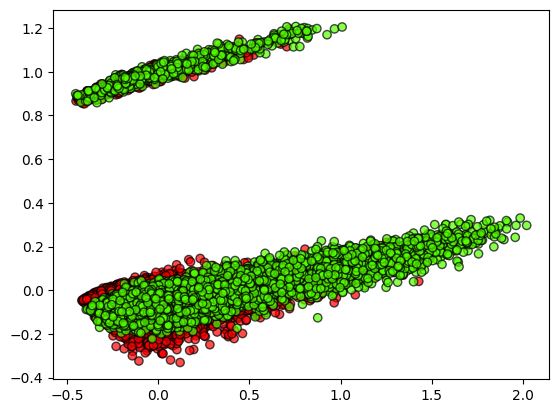

In [31]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

In [32]:
# Faccio il decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# fit
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# predict
y_pred = clf.predict(X_test)

# Return probability estimates for the test data X.
y_val_pred_proba = clf.predict_proba(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.49      0.66     41094
           1       0.14      0.94      0.24      3494

    accuracy                           0.53     44588
   macro avg       0.56      0.71      0.45     44588
weighted avg       0.92      0.53      0.62     44588



# Oversampling

In [33]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

### RandomOverSampler

In [34]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 95885, 1: 95885})


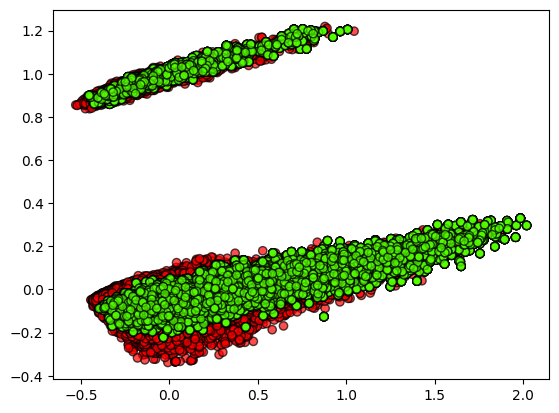

In [35]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

In [36]:
# Faccio il decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# fit
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# predict
y_pred = clf.predict(X_test)

# Return probability estimates for the test data X.
y_val_pred_proba = clf.predict_proba(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     41094
           1       0.41      0.49      0.45      3494

    accuracy                           0.91     44588
   macro avg       0.68      0.71      0.70     44588
weighted avg       0.91      0.91      0.91     44588



### SMOTE

In [37]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 95885, 1: 95885})


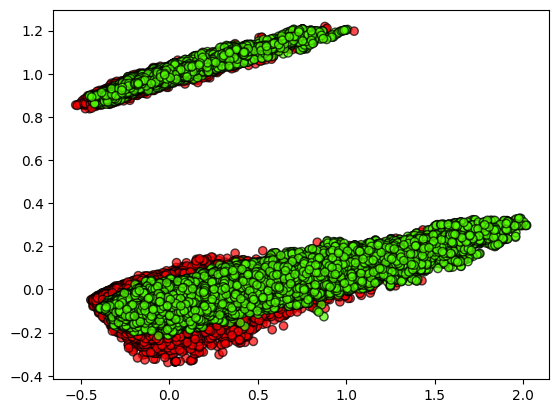

In [38]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

In [39]:
# Faccio il decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# fit
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# predict
y_pred = clf.predict(X_test)

# Return probability estimates for the test data X.
y_val_pred_proba = clf.predict_proba(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     41094
           1       0.40      0.47      0.43      3494

    accuracy                           0.90     44588
   macro avg       0.68      0.70      0.69     44588
weighted avg       0.91      0.90      0.91     44588



### ADASYN (>>>SMOTE)

In [40]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 95885, 1: 95510})


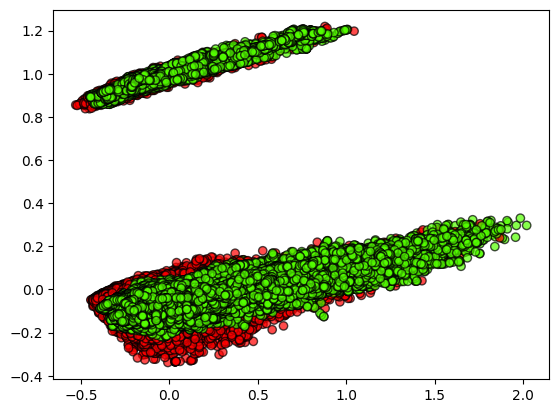

In [41]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

In [42]:
# Faccio il decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# fit
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# predict
y_pred = clf.predict(X_test)

# Return probability estimates for the test data X.
y_val_pred_proba = clf.predict_proba(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     41094
           1       0.40      0.49      0.44      3494

    accuracy                           0.90     44588
   macro avg       0.68      0.71      0.69     44588
weighted avg       0.91      0.90      0.91     44588



# Proviamo una combinazione di RandomUndersampling e ENN

In [43]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 8151, 1: 8151})


In [44]:
enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X_res, y_res)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 8151, 1: 4538})


In [45]:
# Faccio il decision tree (DOPO LE TRASFORMAZIONI)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# fit
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# predict
y_pred = clf.predict(X_test)

# Return probability estimates for the test data X.
y_val_pred_proba = clf.predict_proba(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     41094
           1       0.40      0.63      0.49      3494

    accuracy                           0.90     44588
   macro avg       0.68      0.77      0.71     44588
weighted avg       0.92      0.90      0.91     44588



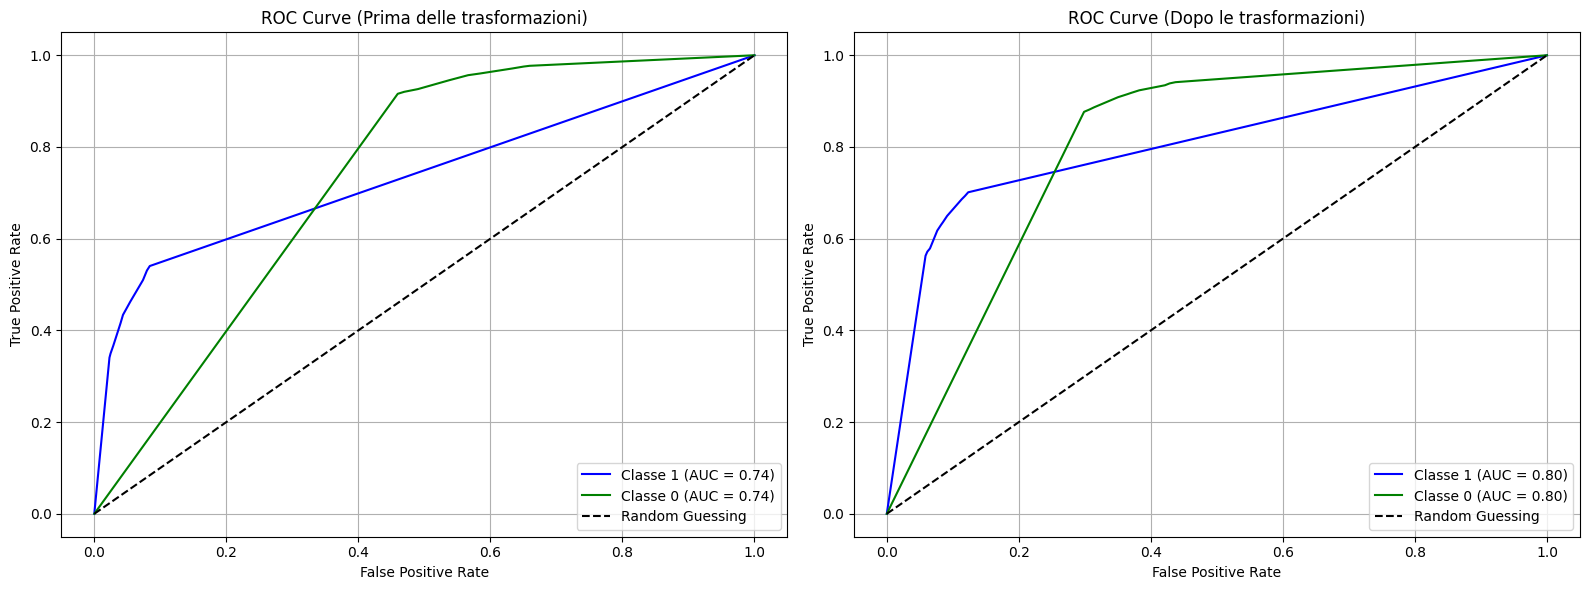

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# -------- ROC PRIMA DELLA TRASFORMAZIONE --------
# Classe 1
fpr_1_og, tpr_1_og, _ = roc_curve(y_test, y_val_pred_proba_og[:, 1])
auc_1_og = roc_auc_score(y_test, y_val_pred_proba_og[:, 1])

# Classe 0
y_test_inverted = 1 - y_test
fpr_0_og, tpr_0_og, _ = roc_curve(y_test_inverted, y_val_pred_proba_og[:, 0])
auc_0_og = roc_auc_score(y_test_inverted, y_val_pred_proba_og[:, 0])

# -------- ROC DOPO LA TRASFORMAZIONE --------
# Classe 1
fpr_1, tpr_1, _ = roc_curve(y_test, y_val_pred_proba[:, 1])
auc_1 = roc_auc_score(y_test, y_val_pred_proba[:, 1])

# Classe 0
fpr_0, tpr_0, _ = roc_curve(y_test_inverted, y_val_pred_proba[:, 0])
auc_0 = roc_auc_score(y_test_inverted, y_val_pred_proba[:, 0])

# -------- PLOT SUBPLOTS --------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot originale
axes[0].plot(fpr_1_og, tpr_1_og, label=f"Classe 1 (AUC = {auc_1_og:.2f})", color='blue')
axes[0].plot(fpr_0_og, tpr_0_og, label=f"Classe 0 (AUC = {auc_0_og:.2f})", color='green')
axes[0].plot([0, 1], [0, 1], 'k--', label="Random Guessing")
axes[0].set_title("ROC Curve (Prima delle trasformazioni)")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend(loc="lower right")
axes[0].grid()

# Plot trasformato
axes[1].plot(fpr_1, tpr_1, label=f"Classe 1 (AUC = {auc_1:.2f})", color='blue')
axes[1].plot(fpr_0, tpr_0, label=f"Classe 0 (AUC = {auc_0:.2f})", color='green')
axes[1].plot([0, 1], [0, 1], 'k--', label="Random Guessing")
axes[1].set_title("ROC Curve (Dopo le trasformazioni)")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend(loc="lower right")
axes[1].grid()

plt.tight_layout()
plt.show()



# Balancing at the Algorithm Level

### è stata eseguita una grid-search dei pesi delle classi, e riportato il risultato migliore

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Impostare i parametri da esplorare per la GridSearch
param_grid = {
    'class_weight': [
        {0: 1, 1: 1},      # Pesatura bilanciata tra le classi
        {0: 2, 1: 1},      # Più peso alla classe 0
        {0: 3, 1: 1},      # Ancora più peso alla classe 0
        {0: 1, 1: 2},      # Più peso alla classe 1
        {0: 1, 1: 3},      # Ancora più peso alla classe 1
    ],
    'min_samples_leaf': [1, 2, 3, 5],  # Diversi valori per min_samples_leaf
}

# Inizializzare il modello
clf = DecisionTreeClassifier(random_state=42)

# Inizializzare la GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Eseguire la GridSearch
grid_search.fit(X_train, y_train)

# Ottenere i migliori parametri
print("Migliori parametri trovati: ", grid_search.best_params_)

# Prevedere sui dati di test con il miglior modello
y_pred = grid_search.best_estimator_.predict(X_test)

y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)

# Stampare il classification report per il miglior modello
print("Classification Report:\n", classification_report(y_test, y_pred))


Migliori parametri trovati:  {'class_weight': {0: 3, 1: 1}, 'min_samples_leaf': 5}
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     41094
           1       0.60      0.34      0.44      3494

    accuracy                           0.93     44588
   macro avg       0.77      0.66      0.70     44588
weighted avg       0.92      0.93      0.92     44588



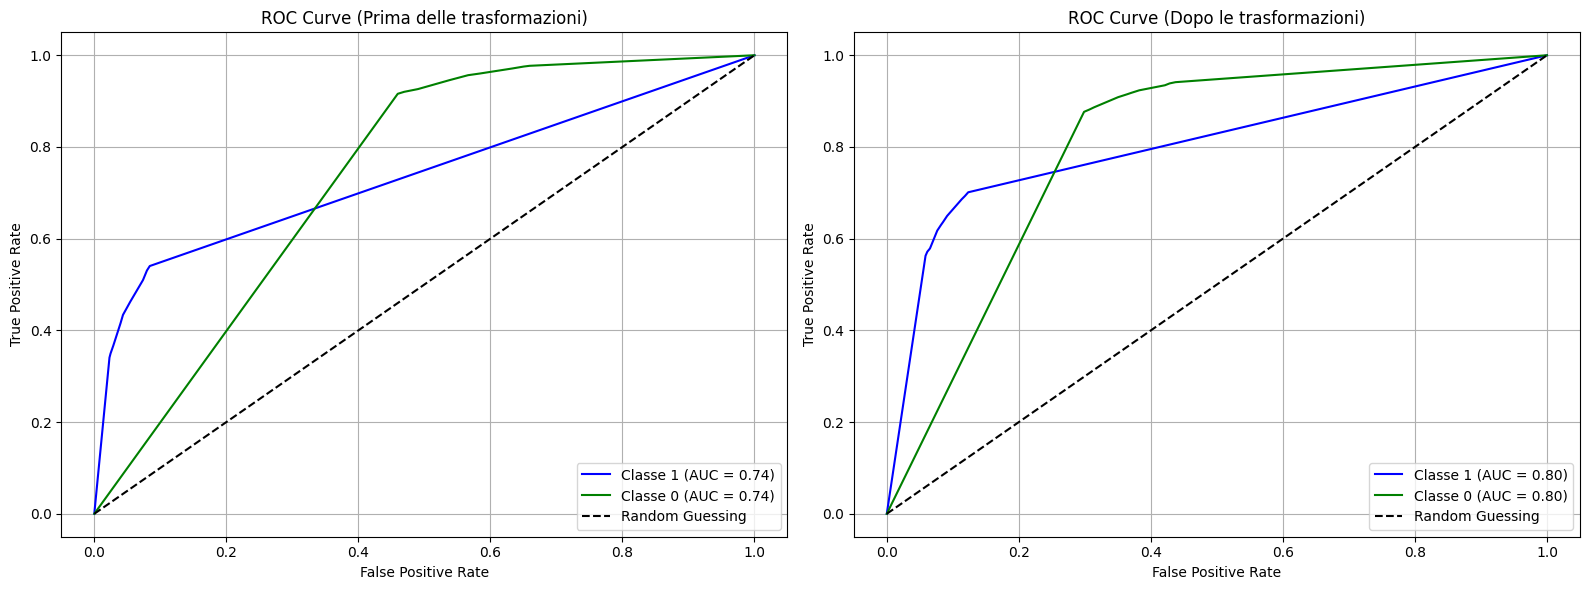

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# -------- ROC PRIMA DELLA TRASFORMAZIONE --------
# Classe 1
fpr_1_og, tpr_1_og, _ = roc_curve(y_test, y_val_pred_proba_og[:, 1])
auc_1_og = roc_auc_score(y_test, y_val_pred_proba_og[:, 1])

# Classe 0
y_test_inverted = 1 - y_test
fpr_0_og, tpr_0_og, _ = roc_curve(y_test_inverted, y_val_pred_proba_og[:, 0])
auc_0_og = roc_auc_score(y_test_inverted, y_val_pred_proba_og[:, 0])

# -------- ROC DOPO LA TRASFORMAZIONE --------
# Classe 1
fpr_1, tpr_1, _ = roc_curve(y_test, y_val_pred_proba[:, 1])
auc_1 = roc_auc_score(y_test, y_val_pred_proba[:, 1])

# Classe 0
fpr_0, tpr_0, _ = roc_curve(y_test_inverted, y_val_pred_proba[:, 0])
auc_0 = roc_auc_score(y_test_inverted, y_val_pred_proba[:, 0])

# -------- PLOT SUBPLOTS --------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot originale
axes[0].plot(fpr_1_og, tpr_1_og, label=f"Classe 1 (AUC = {auc_1_og:.2f})", color='blue')
axes[0].plot(fpr_0_og, tpr_0_og, label=f"Classe 0 (AUC = {auc_0_og:.2f})", color='green')
axes[0].plot([0, 1], [0, 1], 'k--', label="Random Guessing")
axes[0].set_title("ROC Curve (Prima delle trasformazioni)")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend(loc="lower right")
axes[0].grid()

# Plot trasformato
axes[1].plot(fpr_1, tpr_1, label=f"Classe 1 (AUC = {auc_1:.2f})", color='blue')
axes[1].plot(fpr_0, tpr_0, label=f"Classe 0 (AUC = {auc_0:.2f})", color='green')
axes[1].plot([0, 1], [0, 1], 'k--', label="Random Guessing")
axes[1].set_title("ROC Curve (Dopo le trasformazioni)")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend(loc="lower right")
axes[1].grid()

plt.tight_layout()
plt.show()



## Proviamo a fare prima oversampling e poi undersampling

#### Prima ADASYN, poi, per undersampling della classe maggioritaria mantenendo i campioni più informativi, Tomek, infine ENN per pulire il rumore al confine tra le due classi

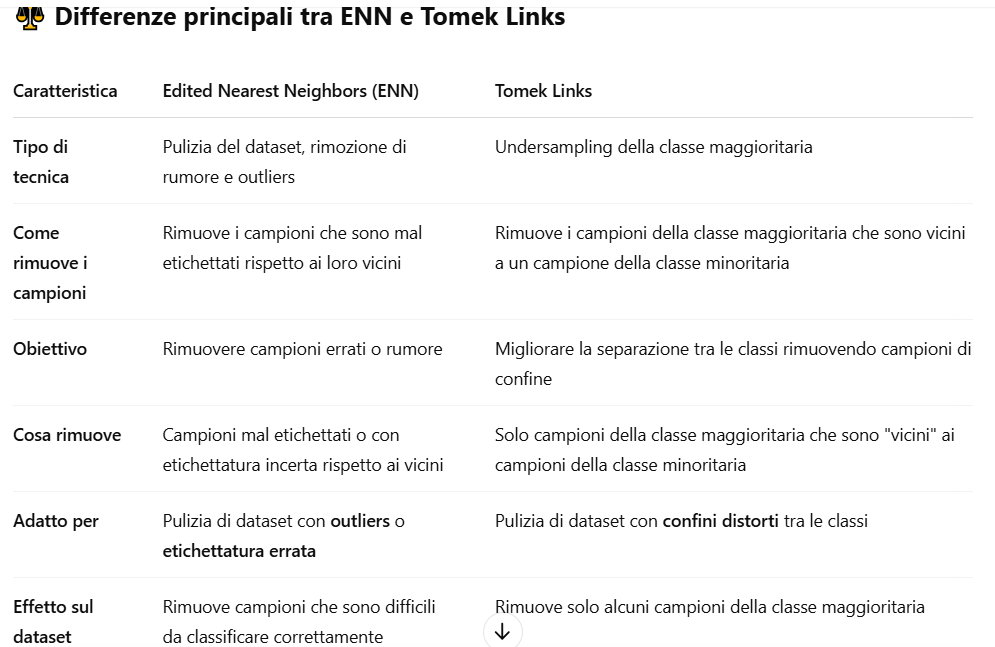

In [49]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 95885, 1: 95510})


In [50]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_res, y_res)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 95850, 1: 95510})


In [51]:
enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X_res, y_res)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 95510, 0: 77960})


In [52]:
# Faccio il decision tree (DOPO LE TRASFORMAZIONI)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# fit
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# predict
y_pred = clf.predict(X_test)

# Return probability estimates for the test data X.
y_val_pred_proba = clf.predict_proba(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93     41094
           1       0.36      0.70      0.48      3494

    accuracy                           0.88     44588
   macro avg       0.67      0.80      0.71     44588
weighted avg       0.92      0.88      0.90     44588



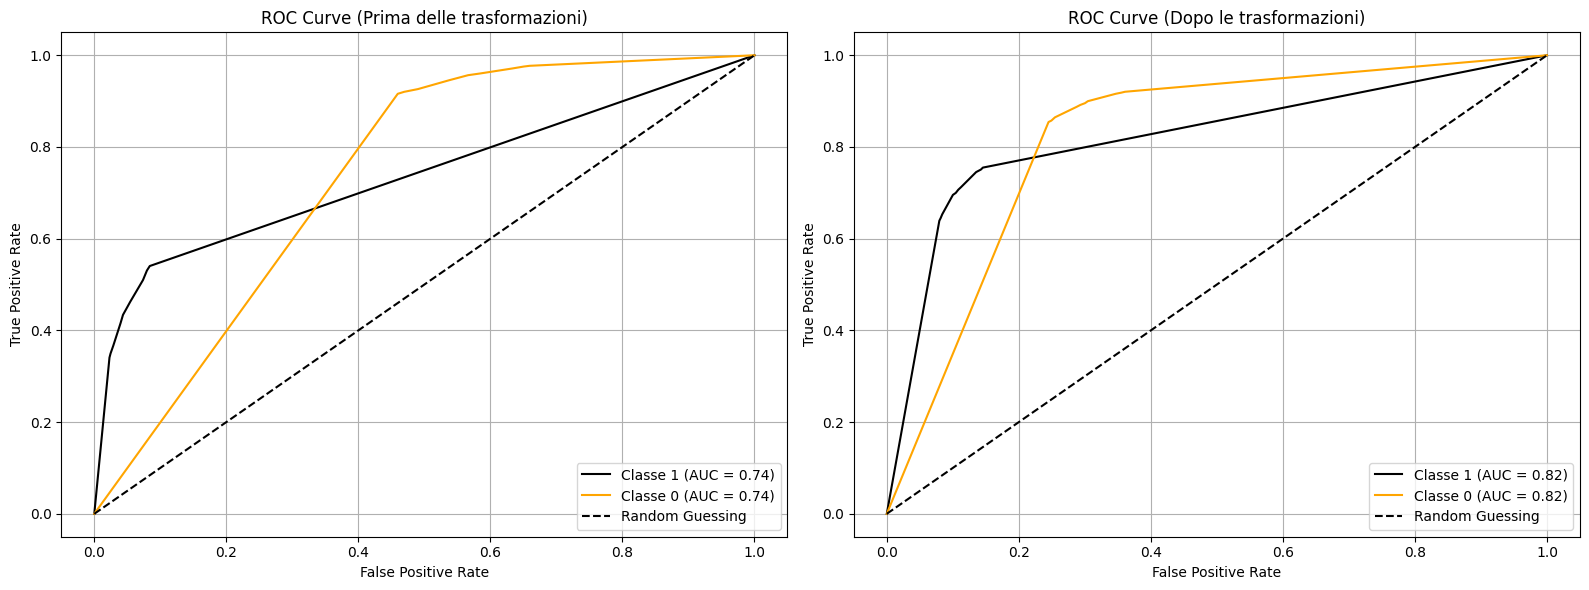

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# -------- ROC PRIMA DELLA TRASFORMAZIONE --------
# Classe 1
fpr_1_og, tpr_1_og, _ = roc_curve(y_test, y_val_pred_proba_og[:, 1])
auc_1_og = roc_auc_score(y_test, y_val_pred_proba_og[:, 1])

# Classe 0
y_test_inverted = 1 - y_test
fpr_0_og, tpr_0_og, _ = roc_curve(y_test_inverted, y_val_pred_proba_og[:, 0])
auc_0_og = roc_auc_score(y_test_inverted, y_val_pred_proba_og[:, 0])

# -------- ROC DOPO LA TRASFORMAZIONE --------
# Classe 1
fpr_1, tpr_1, _ = roc_curve(y_test, y_val_pred_proba[:, 1])
auc_1 = roc_auc_score(y_test, y_val_pred_proba[:, 1])

# Classe 0
fpr_0, tpr_0, _ = roc_curve(y_test_inverted, y_val_pred_proba[:, 0])
auc_0 = roc_auc_score(y_test_inverted, y_val_pred_proba[:, 0])

# -------- PLOT SUBPLOTS --------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot originale
axes[0].plot(fpr_1_og, tpr_1_og, label=f"Classe 1 (AUC = {auc_1_og:.2f})", color='black')
axes[0].plot(fpr_0_og, tpr_0_og, label=f"Classe 0 (AUC = {auc_0_og:.2f})", color='orange')
axes[0].plot([0, 1], [0, 1], 'k--', label="Random Guessing")
axes[0].set_title("ROC Curve (Prima delle trasformazioni)")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend(loc="lower right")
axes[0].grid()

# Plot trasformato
axes[1].plot(fpr_1, tpr_1, label=f"Classe 1 (AUC = {auc_1:.2f})", color='black')
axes[1].plot(fpr_0, tpr_0, label=f"Classe 0 (AUC = {auc_0:.2f})", color='orange')
axes[1].plot([0, 1], [0, 1], 'k--', label="Random Guessing")
axes[1].set_title("ROC Curve (Dopo le trasformazioni)")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend(loc="lower right")
axes[1].grid()

plt.tight_layout()
plt.show()



## Proviamo vari parametri per i metodi

### Grid parametri di ADASYN (praticamente riporta il dataset senza oversampling)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline

# Definisci il classificatore
clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

# Definisci l'oversampler
adasyn = ADASYN(random_state=42)

# Crea la pipeline
pipeline = Pipeline([
    ('adasyn', adasyn),
    ('clf', clf)
])

# Definisci la griglia dei parametri
param_grid = {
    'adasyn__sampling_strategy': ['minority', 'not minority', 'not majority', 'all', 'auto'],
    'adasyn__n_neighbors': [3, 5, 7]
}

# Imposta la GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Esegui la grid search
grid_search.fit(X_train, y_train)

# Stampa i migliori parametri
print("Migliori parametri trovati:")
print(grid_search.best_params_)

# Valuta il modello sui dati di test
y_pred = grid_search.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Migliori parametri trovati:
{'adasyn__n_neighbors': 3, 'adasyn__sampling_strategy': 'not minority'}
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     41094
           1       0.50      0.41      0.45      3494

    accuracy                           0.92     44588
   macro avg       0.73      0.69      0.71     44588
weighted avg       0.92      0.92      0.92     44588



In [55]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 95510, 0: 77960})
